In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
# set fresh env for keras install Python >= 3.9 | TensorFlow = Version: 2.14.0 | Keras-ocr = Version: 0.9.2
import os, sys
sys.path.append('../scripts/')
import keras_ocr
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import math
import numpy as np
#import ocr as o

# not setup with cuda yet

Looking for C:\Users\alexad\.keras-ocr\craft_mlt_25k.h5

Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.

Looking for C:\Users\alexad\.keras-ocr\crnn_kurapan.h5
3/3 [==============================] - 3s 754ms/step


<Axes: >

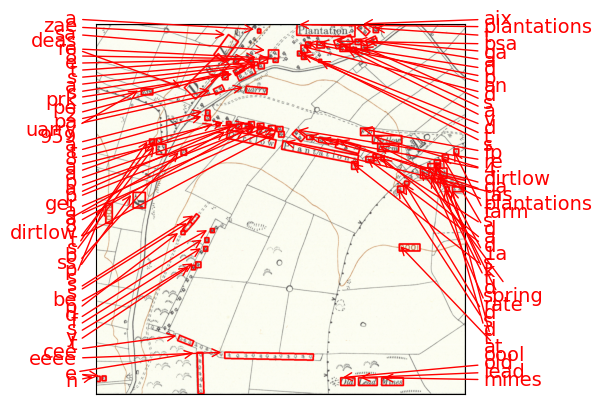

In [3]:
pipeline = keras_ocr.pipeline.Pipeline()
#read image from the an image path (a jpg/png file or an image url)
img = keras_ocr.tools.read("../content/tifs/1k_tifs/SK1868.tif")
# Prediction_groups is a list of (word, box) tuples
prediction_groups = pipeline.recognize([img])
#print image with annotation and boxes
keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])

In [6]:
df = pd.DataFrame(prediction_groups)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,"(plantations, [[809.8577, 0.58242166], [1043.3...","(aix, [[1068.2881, -1.7527933], [1103.2334, 30...","(t, [[1116.794, 14.560547], [1137.1787, 14.560...","(a, [[650.85645, 20.384766], [663.96094, 20.38...","(ga, [[1085.0001, 66.340256], [1124.0542, 48.5...","(psa, [[957.6816, 67.16825], [1024.971, 43.291...","(a, [[1043.9912, 61.154297], [1067.2881, 61.15...","(zae, [[533.96344, 42.095028], [573.57324, 71....","(d, [[889.6494, 71.34668], [920.22656, 71.3466...","(p, [[844.5117, 72.802734], [864.8965, 72.8027...",...,"(y, [[401.8711, 958.084], [422.25586, 958.084]...","(t, [[384.39844, 972.64453], [400.41504, 972.6...","(cee, [[337.15195, 1254.567], [393.38577, 1277...","(, [[407.17557, 1323.8221], [429.39862, 1323.1...","(eeee, [[518.48627, 1322.5763], [875.42365, 13...","(e, [[24.75293, 1418.1973], [40.76953, 1418.19...","(n, [[-6.241035e-16, 1419.6533], [16.016602, 1...","(old, [[985.749, 1425.4775], [1042.5352, 1425....","(lead, [[1057.0957, 1425.4775], [1132.8105, 14...","(mines, [[1150.2832, 1425.4775], [1237.6465, 1..."


### cv2 inpaint functions

In [27]:
inpaint_text("../content/tifs/1k_tifs/a.png", keras_ocr.pipeline.Pipeline())

Looking for C:\Users\alexad\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\alexad\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 1s 1s/step


array([[[ 51,  51,  51],
        [ 31,  31,  31],
        [ 20,  20,  19],
        ...,
        [ 41,  39,  37],
        [ 34,  30,  27],
        [ 29,  23,  18]],

       [[222, 222, 222],
        [131, 131, 130],
        [ 61,  59,  56],
        ...,
        [142, 136, 127],
        [120, 110, 102],
        [102,  89,  78]],

       [[255, 255, 255],
        [151, 151, 151],
        [ 73,  74,  73],
        ...,
        [154, 153, 152],
        [130, 125, 124],
        [110, 103,  97]],

       ...,

       [[255, 255, 255],
        [156, 156, 156],
        [ 98,  99,  95],
        ...,
        [169, 169, 166],
        [132, 130, 127],
        [143, 143, 140]],

       [[255, 255, 255],
        [152, 152, 151],
        [ 77,  77,  74],
        ...,
        [137, 137, 133],
        [113, 111, 108],
        [121, 121, 118]],

       [[167, 167, 167],
        [102, 102, 101],
        [ 75,  74,  72],
        ...,
        [162, 161, 158],
        [151, 150, 148],
        [156, 155, 153]]

### Test on Patchify

In [4]:
# test on 5 sample patches
images = [
    keras_ocr.tools.read(img) for img in ["../content/tifs/patches/patch-0-2000-500-2500-#189226695.27_clip.tif#.png",
                                          "../content/tifs/patches/patch-1500-3500-2000-4000-#189226695.27_clip.tif#.png",
                                          "../content/tifs/patches/patch-2000-4000-2500-4500-#189226695.27_clip.tif#.png",
                                          "../content/tifs/patches/patch-4500-6000-5000-6500-#189226695.27_clip.tif#.png",
                                          "../content/tifs/patches/patch-7000-5000-7448-5500-#189226695.27_clip.tif#.png"]]

Looking for C:\Users\alexad\.keras-ocr\craft_mlt_25k.h5
Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.
Looking for C:\Users\alexad\.keras-ocr\crnn_kurapan.h5
2/2 [==============================] - 2s 404ms/step


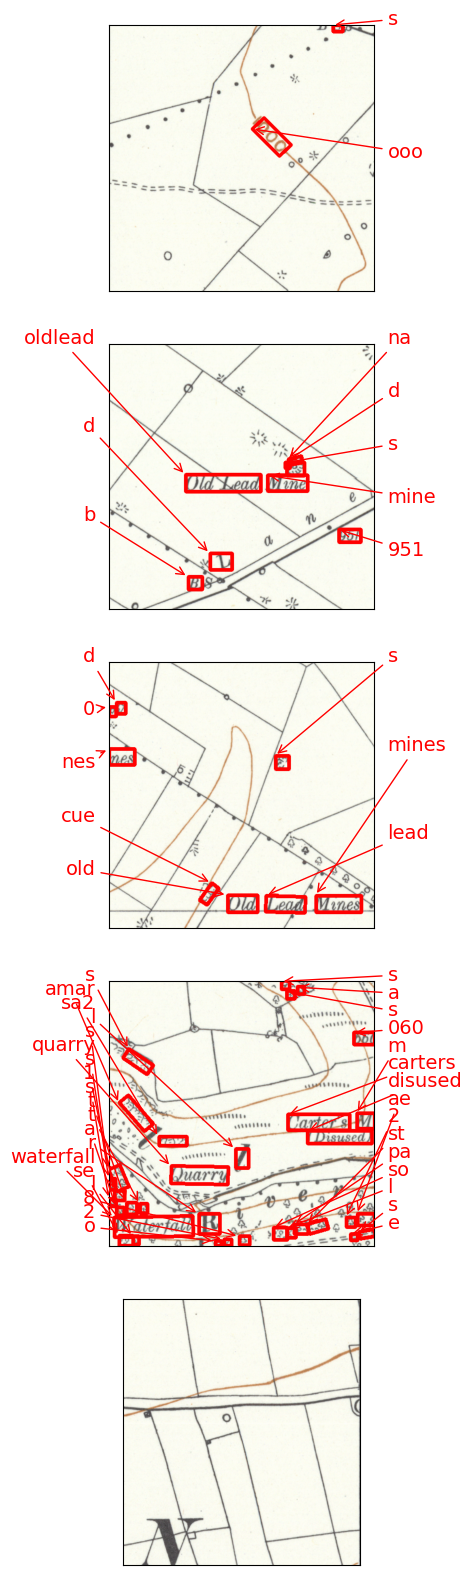

In [6]:
pipeline = keras_ocr.pipeline.Pipeline()
# generate text predictions from the images
prediction_groups = pipeline.recognize(images)

# plot the text predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, 
                                    predictions=predictions, 
                                    ax=ax)